# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries (pandas,numpy, matplotlib etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv) or from the file appl_1980_2014.csv from the datasets folder.

In [2]:
apple=pd.read_csv("D:/python/2. Pandas Basic Exercises (10 Exercises)/2. Pandas Basic Exercises/Exercise Data Files/Pandas Exercise Apple Stock files/appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [3]:
apple=pd.DataFrame(apple)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [6]:
apple.set_index('Date')
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 7.  Is there any duplicate dates?

In [7]:
dup= apple.duplicated().sum()
dup

0

### Step 8.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [8]:
apple['Date'].sort_values(ascending = True)

8464   1980-12-12
8463   1980-12-15
8462   1980-12-16
8461   1980-12-17
8460   1980-12-18
          ...    
4      2014-07-01
3      2014-07-02
2      2014-07-03
1      2014-07-07
0      2014-07-08
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 9. Get the last business day of each month

In [13]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.loc[apple.Date.isin(apple.Date + pd.offsets.BMonthEnd(1))]

,Date,Open,High,Low,Close,Volume,Adj Close,month
5,2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93,6
26,2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43,5
47,2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83,4
68,2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25,3
89,2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76,2
...,...,...,...,...,...,...,...,...
8369,1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44,4
8390,1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38,3
8412,1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41,2
8431,1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44,1


In [14]:
apple['Date']

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

### Step 10.  What is the difference in days between the first day and the oldest

In [9]:
oldest_date = apple['Date'].min()
first_date = apple['Date'].max()
diff = first_date-oldest_date 
diff

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [10]:
apple['Date']= pd.to_datetime(apple['Date'])
apple['month'] = apple['Date'].dt.month
months = apple['month'].count()
print("Total Months in the data",months)

Total Months in the data 8465


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

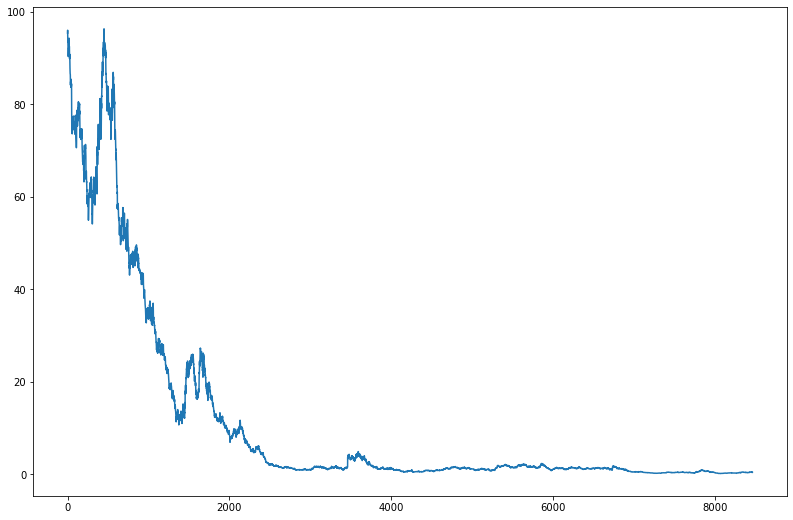

In [11]:
apple['Adj Close'].plot(figsize=(13.5,9))